# Multiple Linear Regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load the data

In [2]:
df = pd.read_csv('games_df.csv')

del df["Unnamed: 0"]
df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,...,month_abbrev,month_num,months_ago,Company,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Genre_Metascore
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Others,20.32,6.37,9.85,...,Sep,9,79,Sony,0.975904,0.0,82.900000,7.860000,7.097440,7.088764
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Others,19.39,6.06,9.71,...,Nov,11,65,Sony,0.142857,0.0,82.900000,7.860000,7.097440,7.088764
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Others,16.15,8.41,5.49,...,Oct,10,210,Sony,0.375000,0.0,82.900000,7.860000,7.097440,7.088764
3,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Others,15.86,9.06,5.33,...,Sep,9,79,Microsoft,0.978947,0.0,82.900000,7.860000,7.097440,7.088764
4,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,14.82,9.07,4.29,...,Nov,11,101,Microsoft,0.747368,0.0,70.563107,6.830097,5.077273,6.974507
5,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,14.74,9.76,3.73,...,Nov,11,113,Microsoft,0.621053,0.0,70.563107,6.830097,7.107895,6.974507
6,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Others,13.94,5.26,6.21,...,Oct,10,18,Sony,0.702381,0.0,82.900000,7.860000,7.097440,6.911504
7,47,Call of Duty: Black Ops II,Shooter,M,X360,Activision,Treyarch,13.86,8.27,4.32,...,Nov,11,89,Microsoft,0.873684,0.0,70.563107,6.830097,7.107895,6.974507
8,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,13.80,4.99,5.88,...,Nov,11,89,Sony,0.855422,0.0,70.563107,6.830097,7.107895,6.974507
9,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,13.53,8.54,3.63,...,Nov,11,125,Microsoft,0.494737,0.0,70.563107,6.830097,5.077273,6.974507


In [3]:
df.describe()

,Rank,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,metascore,userscore,years_ago,month_num,months_ago,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Genre_Metascore
count,6242.000000,6242.000000,5824.000000,5699.000000,1929.000000,6141.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000
mean,7960.043896,0.642241,0.358480,0.223746,0.102234,0.072872,2008.035405,70.595002,7.135421,11.971804,7.332906,140.328741,0.516602,0.132650,70.595002,7.135421,7.135421,7.135421
std,5214.566423,1.223215,0.643239,0.525887,0.162095,0.174725,4.676991,13.100307,1.381198,4.663883,3.302275,55.695882,0.277226,0.339223,4.151322,0.326779,0.249686,0.150820
min,20.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1996.000000,17.000000,0.400000,2.000000,1.000000,18.000000,0.000000,0.000000,59.920000,6.204167,5.077273,6.911504
25%,3501.500000,0.110000,0.070000,0.020000,0.020000,0.010000,2004.000000,63.000000,6.500000,9.000000,4.000000,106.000000,0.312500,0.000000,67.160000,6.876464,7.097440,7.045746
50%,7200.000000,0.270000,0.160000,0.070000,0.050000,0.020000,2008.000000,73.000000,7.500000,12.000000,8.000000,147.000000,0.516602,0.000000,70.222222,7.060317,7.097440,7.088764
75%,12018.500000,0.670000,0.370000,0.210000,0.120000,0.070000,2011.000000,80.000000,8.100000,16.000000,10.000000,185.000000,0.686747,0.000000,73.655773,7.321359,7.097440,7.250746
max,19859.000000,20.320000,9.760000,9.850000,2.170000,3.120000,2020.000000,98.000000,9.400000,24.000000,12.000000,289.000000,1.590909,1.000000,82.900000,8.064000,8.104545,7.450460


In [4]:
df.shape

(6242, 27)

In [5]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'Company',
       'generation_lifespan', 'generation_flag', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Genre_Metascore'],
      dtype='object')

## Manage Categorical Variables

In [6]:
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]

In [7]:
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

In [8]:
categorical_df.describe()

,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Others,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,...,Publisher_SouthPeak Interactive,Publisher_Square Enix,Publisher_THQ,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_VU Games,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Xseed Games
count,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,...,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000
mean,0.018103,0.059276,0.053669,0.048863,0.011375,0.059596,0.021147,0.078500,0.104454,0.130087,...,0.004005,0.016661,0.038930,0.004326,0.010093,0.062961,0.008491,0.009933,0.007850,0.007369
std,0.133335,0.236159,0.225381,0.215598,0.106052,0.236756,0.143886,0.268979,0.305873,0.336426,...,0.063164,0.128009,0.193443,0.065632,0.099963,0.242912,0.091761,0.099175,0.088259,0.085535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Declare the dependent and independent variables

In [9]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'Company',
       'generation_lifespan', 'generation_flag', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Genre_Metascore'],
      dtype='object')

In [10]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)
#features = pd.concat([features, categorical], axis=1)

## Standardization / Scaling and Comparing Weights

In [11]:
scaler = StandardScaler()

In [12]:
# scaler.fit(features)

In [13]:
features_scaled = []
for var in features:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    features_scaled.append(new_col)

In [14]:
features_scaled

['metascore_scaled',
 'userscore_scaled',
 'years_ago_scaled',
 'generation_lifespan_scaled',
 'generation_flag_scaled']

In [15]:
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

In [16]:
fit = ols('Global_Sales ~ metascore_scaled + userscore_scaled + years_ago_scaled + generation_lifespan_scaled + generation_flag_scaled + C(Genre) + C(ESRB_Rating) + C(Company) + C(Publisher)', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     27.79
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          5.75e-320
Time:                        05:23:32   Log-Likelihood:                -9226.6
No. Observations:                6242   AIC:                         1.860e+04
Df Residuals:                    6168   BIC:                         1.910e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.5108      0.138      3.709      0.000       0.241       0.781
C(Genre)[T.Action-Adventure]                               0.0191      0.110      0.173      0.862      -0.197       0.235
C(Genre)[T.Adventure]                                     -0.1771      0.065     -2.709      0.007      -0.305      -0.049
C(Genre)[T.Fighting]                                       0.0056      0.071      0.079      0.937      -0.133       0.144
C(Genre)[T.Misc]                                           0.0045      0.072      0.063      0.950      -0.137       0.146
C(Genre)[T.Others]                                        -0.2522      0.135     -1.866      0.062      -0.517       0.013
C(Genre)[T.Platform]                                      -0.0914      0.069     -1.317      0.188      -0.228       0.045
C(Genre)[T.Puzzle]                                        -0.3085      0.105     -2.937      0.003      -0.514      -0.103
C(Genre)[T.Racing]                                        -0.1464      0.065     -2.236      0.025      -0.275      -0.018
C(Genre)[T.Role-Playing]                                  -0.0723      0.058     -1.243      0.214      -0.186       0.042
C(Genre)[T.Shooter]                                        0.0573      0.052      1.108      0.268      -0.044       0.159
C(Genre)[T.Simulation]                                     0.0208      0.077      0.270      0.787      -0.130       0.172
C(Genre)[T.Sports]                                        -0.1840      0.067     -2.766      0.006      -0.314      -0.054
C(Genre)[T.Strategy]                                      -0.1923      0.078     -2.471      0.013      -0.345      -0.040
C(ESRB_Rating)[T.E10]                                     -0.1632      0.051     -3.184      0.001      -0.264      -0.063
C(ESRB_Rating)[T.M]                                        0.1643      0.056      2.935      0.003       0.055       0.274
C(ESRB_Rating)[T.RP]                                      -0.3091      0.314     -0.985      0.325      -0.924       0.306
C(ESRB_Rating)[T.T]                                       -0.1158      0.045     -2.574      0.010      -0.204      -0.028
C(Company)[T.Nintendo]                                     0.0455      0.044      1.031      0.303      -0.041       0.132
C(Company)[T.PC]                                          -0.3538      0.091     -3.883      0.000      -0.532      -0.175
C(Company)[T.Sega]                                        -0.1567      0.325     -0.482      0.630      -0.794       0.480
C(Company)[T.Sony]                                         0.2784      0.037      7.608      0.000       0.207       0.350
C(Publis

## Initial train test split

In [17]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

In [18]:
features

,metascore,userscore,years_ago,generation_lifespan,generation_flag,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Others,...,Publisher_SouthPeak Interactive,Publisher_Square Enix,Publisher_THQ,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_VU Games,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Xseed Games
0,97,8.3,7,0.975904,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,97,8.3,6,0.142857,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95,8.8,18,0.375000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,97,8.3,7,0.978947,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,3.4,9,0.747368,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,83,8.4,13,0.516602,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6238,85,7.7,19,0.516602,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6239,91,8.5,17,0.516602,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6240,78,7.9,10,0.516602,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (4993, 73) Target:  (4993,)
Training set - Features:  (1249, 73) Target:  (1249,)


## Multiple Linear Regression Models

### Multiple Regression - 1 (all features, dummy data)

#### Training data

In [20]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [21]:
reg.coef_

array([ 3.35470750e-02, -1.27742605e-01, -1.63750168e-02, -7.82669291e-02,
       -2.95901179e-01,  1.06094506e-01, -2.07161707e-01,  3.38386055e-03,
        2.31079346e-02, -2.42103492e-01, -6.12234749e-02, -2.93058697e-01,
       -1.43906228e-01, -7.01139987e-02,  2.63218568e-02,  2.62526359e-02,
       -1.82258784e-01, -2.35836061e-01, -1.66765187e-01,  1.71944339e-01,
       -3.31482774e-01, -1.35714956e-01,  5.63782459e-02, -3.21740077e-01,
       -1.52852251e-01,  2.75045647e-01,  8.77131342e-02, -2.76784485e-01,
       -3.80782290e-02,  5.86260005e-01, -1.41685910e-01, -4.53490534e-01,
        1.63718876e-01, -3.25513326e-01,  5.21717663e-01, -1.69763791e-01,
       -1.22995089e-01, -6.74657443e-02, -1.67609641e-01,  2.50801104e-01,
        2.06766576e-01,  9.49325577e-02, -6.17600078e-02,  3.90593736e-01,
       -4.71878924e-02,  4.49683658e-02, -4.37715133e-01,  6.47095542e-01,
        7.58379248e-02,  5.79866677e-01,  3.94691330e-01, -5.91652415e-02,
       -3.60101366e-01,  

#### Get intercept

In [22]:
reg.intercept_

-0.681620332483021

In [23]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.90150013e-104, 1.45442441e-004, 8.18308656e-005, 9.70170158e-002,
       1.76311654e-017, 6.38032248e-004, 7.98860933e-004, 2.18706303e-001,
       2.80115743e-001, 4.82556969e-001, 7.22896002e-001, 9.31163509e-003,
       2.83567063e-001, 3.56887128e-003, 1.78763068e-007, 4.15635757e-001,
       1.94851488e-003, 6.98693003e-007, 2.67711291e-003, 2.84447993e-024,
       4.54242644e-001, 2.41369542e-011, 3.69290553e-011, 1.54812845e-011,
       3.07389220e-001, 1.80944799e-015, 1.57097205e-001, 1.38113638e-001,
       5.18770289e-002, 3.20472078e-013, 1.63651030e-001, 4.38323579e-002,
       4.08834266e-002, 4.81933343e-004, 2.27842760e-005, 4.91276823e-002,
       2.85842705e-002, 9.08257878e-002, 8.36491208e-002, 8.03295253e-001,
       1.39995551e-005, 8.68073576e-001, 2.77395377e-002, 1.27863565e-006,
       2.21304473e-002, 4.09074529e-001, 2.66916508e-001, 2.07432992e-003,
       1.76296313e-001, 5.23322871e-002, 1.28548041e-002, 7.77491394e-002,
       5.77424138e-004, 8

#### Get r^2 score and adjusted r^2 score

In [24]:
r2_train = reg.score(X_train, y_train)
r2_train

0.25042450809733996

In [25]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.23930049693472677

#### Get error

In [26]:
y_train_pred = reg.predict(X_train)

In [27]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 0.5585926276555995
Mean Squared Error: 1.1110602616387155
Root Mean Squared Error: 1.054068433090905


In [28]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.4566595002941756
Root Mean Squared Error: 0.8617198654256749


#### Test Data

In [29]:
reg.score(X_test, y_test)

0.21753332413051252

In [30]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.16892050086372734

In [31]:
y_test_pred = reg.predict(X_test)

In [32]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 0.61697930125699
Mean Squared Error: 1.210843926565071
Root Mean Squared Error: 1.100383536120507


In [33]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5043916540509364
Root Mean Squared Error Z: 0.8995832935456242


In [34]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

-257.473

Text(0, 0.5, 'Predictions')

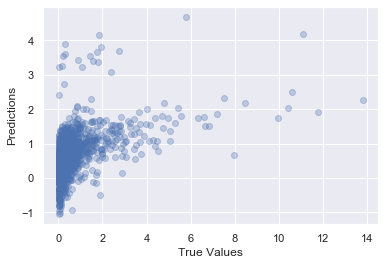

In [35]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

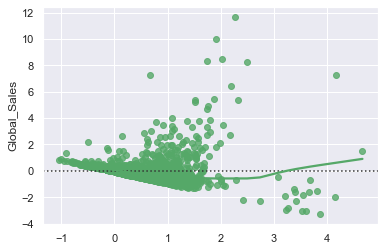

In [36]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

In [37]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


#### Updated summary table of all models

In [38]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All features, dummy data' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, dummy data",1.054068,0.250425,0.2393,0.217533,0.168921,-257.473


### Multiple Regression - 2 (all features, aggregated categorical data)

In [39]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'Company',
       'generation_lifespan', 'generation_flag', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Genre_Metascore',
       'metascore_scaled', 'userscore_scaled', 'years_ago_scaled',
       'generation_lifespan_scaled', 'generation_flag_scaled'],
      dtype='object')

In [40]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Training data

In [41]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (4993, 76) Target:  (4993,)
Training set - Features:  (1249, 76) Target:  (1249,)


In [42]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [43]:
reg.coef_

array([ 3.37484231e-02, -1.17246802e-01, -1.64873802e-02, -8.05351190e-02,
       -2.96596327e-01, -5.06272921e+09,  2.62798733e+10, -4.46451453e-01,
        9.65947128e-02, -2.14072704e-01, -3.15332413e-03,  5.43179512e-02,
       -2.29041815e-01, -4.91294861e-02, -2.88424969e-01, -1.29378557e-01,
       -7.30509758e-02, -3.14426422e-03,  5.29980659e-03, -1.84672356e-01,
       -2.35101461e-01, -1.62367463e-01,  1.73587799e-01, -3.12531829e-01,
       -1.14431381e-01,  5.76219559e-02, -3.42984438e-01, -9.71872807e-02,
        2.70185471e-01,  3.12171075e+10, -1.36238449e+10, -2.85779351e+10,
       -2.64394501e+09, -5.69574762e+10, -1.23740812e+10, -3.04349108e+10,
       -5.49452100e+09,  1.74522787e+10, -6.98423970e+09, -7.12955735e+09,
       -4.20609548e+10, -2.03710671e+10, -2.51235562e+10,  3.60333500e+10,
        7.58672306e+09, -1.71692301e+10,  6.93378117e+09, -5.84339013e+10,
       -2.49915722e+10,  3.28008113e+10,  1.44742423e+09, -3.23336801e+10,
        7.01346782e+09,  

#### Get intercept

In [44]:
reg.intercept_

180391760738.0903

In [45]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.90150013e-104, 1.45442441e-004, 8.18308656e-005, 9.70170158e-002,
       1.76311654e-017, 5.54137629e-061, 5.77703213e-003, 1.85924625e-013,
       6.38032248e-004, 7.98860933e-004, 2.18706303e-001, 2.80115743e-001,
       4.82556969e-001, 7.22896002e-001, 9.31163509e-003, 2.83567063e-001,
       3.56887128e-003, 1.78763068e-007, 4.15635757e-001, 1.94851488e-003,
       6.98693003e-007, 2.67711291e-003, 2.84447993e-024, 4.54242644e-001,
       2.41369542e-011, 3.69290553e-011, 1.54812845e-011, 3.07389220e-001,
       1.80944799e-015, 1.57097205e-001, 1.38113638e-001, 5.18770289e-002,
       3.20472078e-013, 1.63651030e-001, 4.38323579e-002, 4.08834266e-002,
       4.81933343e-004, 2.27842760e-005, 4.91276823e-002, 2.85842705e-002,
       9.08257878e-002, 8.36491208e-002, 8.03295253e-001, 1.39995551e-005,
       8.68073576e-001, 2.77395377e-002, 1.27863565e-006, 2.21304473e-002,
       4.09074529e-001, 2.66916508e-001, 2.07432992e-003, 1.76296313e-001,
       5.23322871e-002, 1

#### Get r^2 score and adjusted r^2 score

In [46]:
r2_train = reg.score(X_train, y_train)
r2_train

0.25725603445734346

In [47]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.24577341822844967

#### Get error

In [48]:
y_train_pred = reg.predict(X_train)

In [49]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 0.5615609644028984
Mean Squared Error: 1.1009342135662648
Root Mean Squared Error: 1.0492541224919085


In [50]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.459086168869118
Root Mean Squared Error: 0.8577840800902585


#### Test Data

In [51]:
reg.score(X_test, y_test)

0.2219336600395273

In [52]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.17147884618543519

In [53]:
y_test_pred = reg.predict(X_test)

In [54]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 0.6224060820922364
Mean Squared Error: 1.2040345375206671
Root Mean Squared Error: 1.0972850757759658


In [55]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5088281447988192
Root Mean Squared Error Z: 0.8970502465941131


In [56]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

-258.709

Text(0, 0.5, 'Predictions')

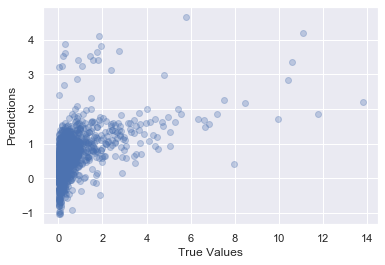

In [57]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [58]:
r2_test

0.2219336600395273

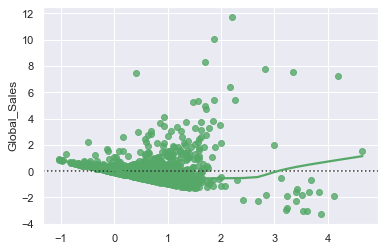

In [59]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [60]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Minus sqft_above' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, dummy data",1.054068,0.250425,0.239300,0.217533,0.168921,-257.473
1,Multiple Regression-2,Minus sqft_above,1.049254,0.257256,0.245773,0.221934,0.171479,-258.709


### Multiple Regression - 3 (all features polynomial 1st degree)

In [61]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

KeyError: 'price'

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'All features 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 4 (all features polynomial 2nd degree)

In [ ]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'All features, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 5 (minus sqft_above, polynomial 1st degree)

In [ ]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'minus sqft_above 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test , '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 6 (minus sft_above, polynomial 2nd degree)

In [ ]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-6', 'Description' : 'minus sqft_above, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 7 (all features, no outliers)

#### Clean data of outliers

In [ ]:
price_top = df['price'].quantile(0.975)
lot_top = df['sqft_lot'].quantile(0.975)
bed_top = df['bedrooms'].quantile(0.975)
price_bottom = df['price'].quantile(0.025)
lot_bottom = df['sqft_lot'].quantile(0.025)
bed_bottom = df['bedrooms'].quantile(0.025)
clean_df = df[(df['price']<price_top) & (df['price']>price_bottom) & (df['bedrooms'] < bed_top) & (df['bedrooms'] > bed_bottom) & (df['sqft_lot'] < lot_top) & (df['sqft_lot'] > lot_bottom)] 

clean_df.describe()

In [ ]:
clean_df.describe()

In [ ]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
# poly = PolynomialFeatures(2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-7', 'Description' : 'all features: minus outliers' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 8 (all features, no outliers, 2nd degree polynomial)

#### Clean data of outliers

In [ ]:
# q = df['price'].quantile(0.99)
# clean_df = df[df['price']<q]http://localhost:8964/notebooks/bryan_index.ipynb#
# clean_df.describe()

# q = clean_df['sqft_lot'].quantile(0.99)
# clean_df = clean_df[clean_df['sqft_lot']<q]
# clean_df.describe()

In [ ]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

In [ ]:
# features2_df['Weights'] = reg.coef_
# features2_df['P Values'] = p_values.round(3)
# features2_df.sort_values(['Weights'], ascending=False)

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-8', 'Description' : 'all features, no outliers, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

### Multiple Regression - 9 (minus sqft_above, no outliers, 2nd degree polynomial)

#### Clean data of outliers

In [ ]:
# q = df['price'].quantile(0.99)
# clean_df = df[df['price']<q]http://localhost:8964/notebooks/bryan_index.ipynb#
# clean_df.describe()

# q = clean_df['sqft_lot'].quantile(0.99)
# clean_df = clean_df[clean_df['sqft_lot']<q]
# clean_df.describe()

In [ ]:
target = clean_df['price']
features = clean_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
scaler.fit(features)

In [ ]:
features_scaled = scaler.transform(features)
features_scaled


#### Training data

In [ ]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#### Get coefficients

In [ ]:
reg.coef_

#### Get intercept

In [ ]:
reg.intercept_

#### Feature summary and weights

In [ ]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

In [ ]:
p_values = f_regression(X_train,y_train)[1]
p_values

In [ ]:
# features2_df['Weights'] = reg.coef_
# features2_df['P Values'] = p_values.round(3)
# features2_df.sort_values(['Weights'], ascending=False)

#### Get r^2 score and adjusted r^2 score

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_train

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

#### Get error

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

#### Test Data

In [ ]:
reg.score(X_test, y_test)

In [ ]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
cv

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
r2_test

In [ ]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

#### Updated summary table of all models

In [ ]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-9', 'Description' : 'without sqft_above, no outliers, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test, '5-fold Cross Validation' : cv} , ignore_index=True)
summary_df

In [ ]:
test_df = pd.read_csv("kc_house_data_test_features.csv", index_col=0)

In [ ]:
test_df

In [ ]:
del test_df['date']

In [ ]:
test_df.shape

In [ ]:
main_df = pd.read_csv("kc_house_data.csv", index_col=0)

In [ ]:
#result_df = pd.merge(test_df, main_df[['id','price']],on='id', how='left')
result_df = pd.merge(test_df, main_df.iloc[:, [1]], how='left', on='id')


In [ ]:
result_df.shape

In [ ]:
result_df.to_csv (r'test_df_prices.csv', index = False, header=True)

In [ ]:
result_df.drop_duplicates('id', inplace = True, keep='first')

In [ ]:
result_df.shape

In [ ]:
target2 = result_df['price']
features2 = result_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
target2.shape

In [ ]:
features2

In [ ]:
predictions = reg.predict(poly.fit_transform(features2))

In [ ]:
predictions.shape

In [ ]:
X_test.shape

In [ ]:
result = reg.predict(X_test)

In [ ]:
reg.score(poly.fit_transform(test_df), predictions)

In [ ]:
x = poly.fit_transform(test_df).reshape(-1, 1)
x.shape

In [ ]:
test_mae = metrics.mean_absolute_error(target2, predictions)
test_mse = metrics.mean_squared_error(target2, predictions)
test_rmse = np.sqrt(metrics.mean_squared_error(target2, predictions))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
result_df["predictions"] = predictions

In [ ]:
result_df.to_csv (r'test_df_prices.csv', index = False, header=True)